# ML Zoomcamp 2023 &ndash; Midterm Project

The _Heart failure clinical records_ dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. The data set can be retrieved from the UCI Machine Learning Repository at the link, [Heart failure clinical records](http://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records). The research article for the data set can be accessed at the link, [Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone](https://www.semanticscholar.org/paper/Machine-learning-can-predict-survival-of-patients-Chicco-Jurman/e64579d8593140396b518682bb3a47ba246684eb) (link to pdf of article [here](https://bmcmedinformdecismak.biomedcentral.com/counter/pdf/10.1186/s12911-020-1023-5.pdf)).

* [Data preparation](#Data-preparaion)
* [Exploratory data analysis](#Exploratory-data-analysis)
    * [Box plots on numerical features](#Box-plots-on-numerical-features)
    * [Bar plots of counts of death events, anaemia, diabetes, high blood pressure, sex and smoking](#Bar-plots-of-counts-of-death-events,-anaemia,-diabetes,-high-blood-pressure,-sex-and-smoking)
* [Modeling](#Modeling)
    * [Data preparation for modeling](#Data-preparation-for-modeling)
    * [Modeling with Logistic Regression, Decision Trees and Random Forests](#Modeling-with-Logistic-Regression,-Decision-Trees-and-Random-Forests)
    * [Parameter tuning with Random Forests](#Parameter-tuning-with-Random-Forests)
    * [Feature importance using Random Forests](#Feature-importance-using-Random-Forests)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

## Data preparation

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.rename(columns={'DEATH_EVENT': 'death_event'}, inplace=True)
for col in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'death_event']:
    df[col].replace(to_replace=[0, 1], value=['No', 'Yes'], inplace=True)
df.sex.replace(to_replace=[0, 1], value=['Female', 'Male'], inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


## Exploratory data analysis

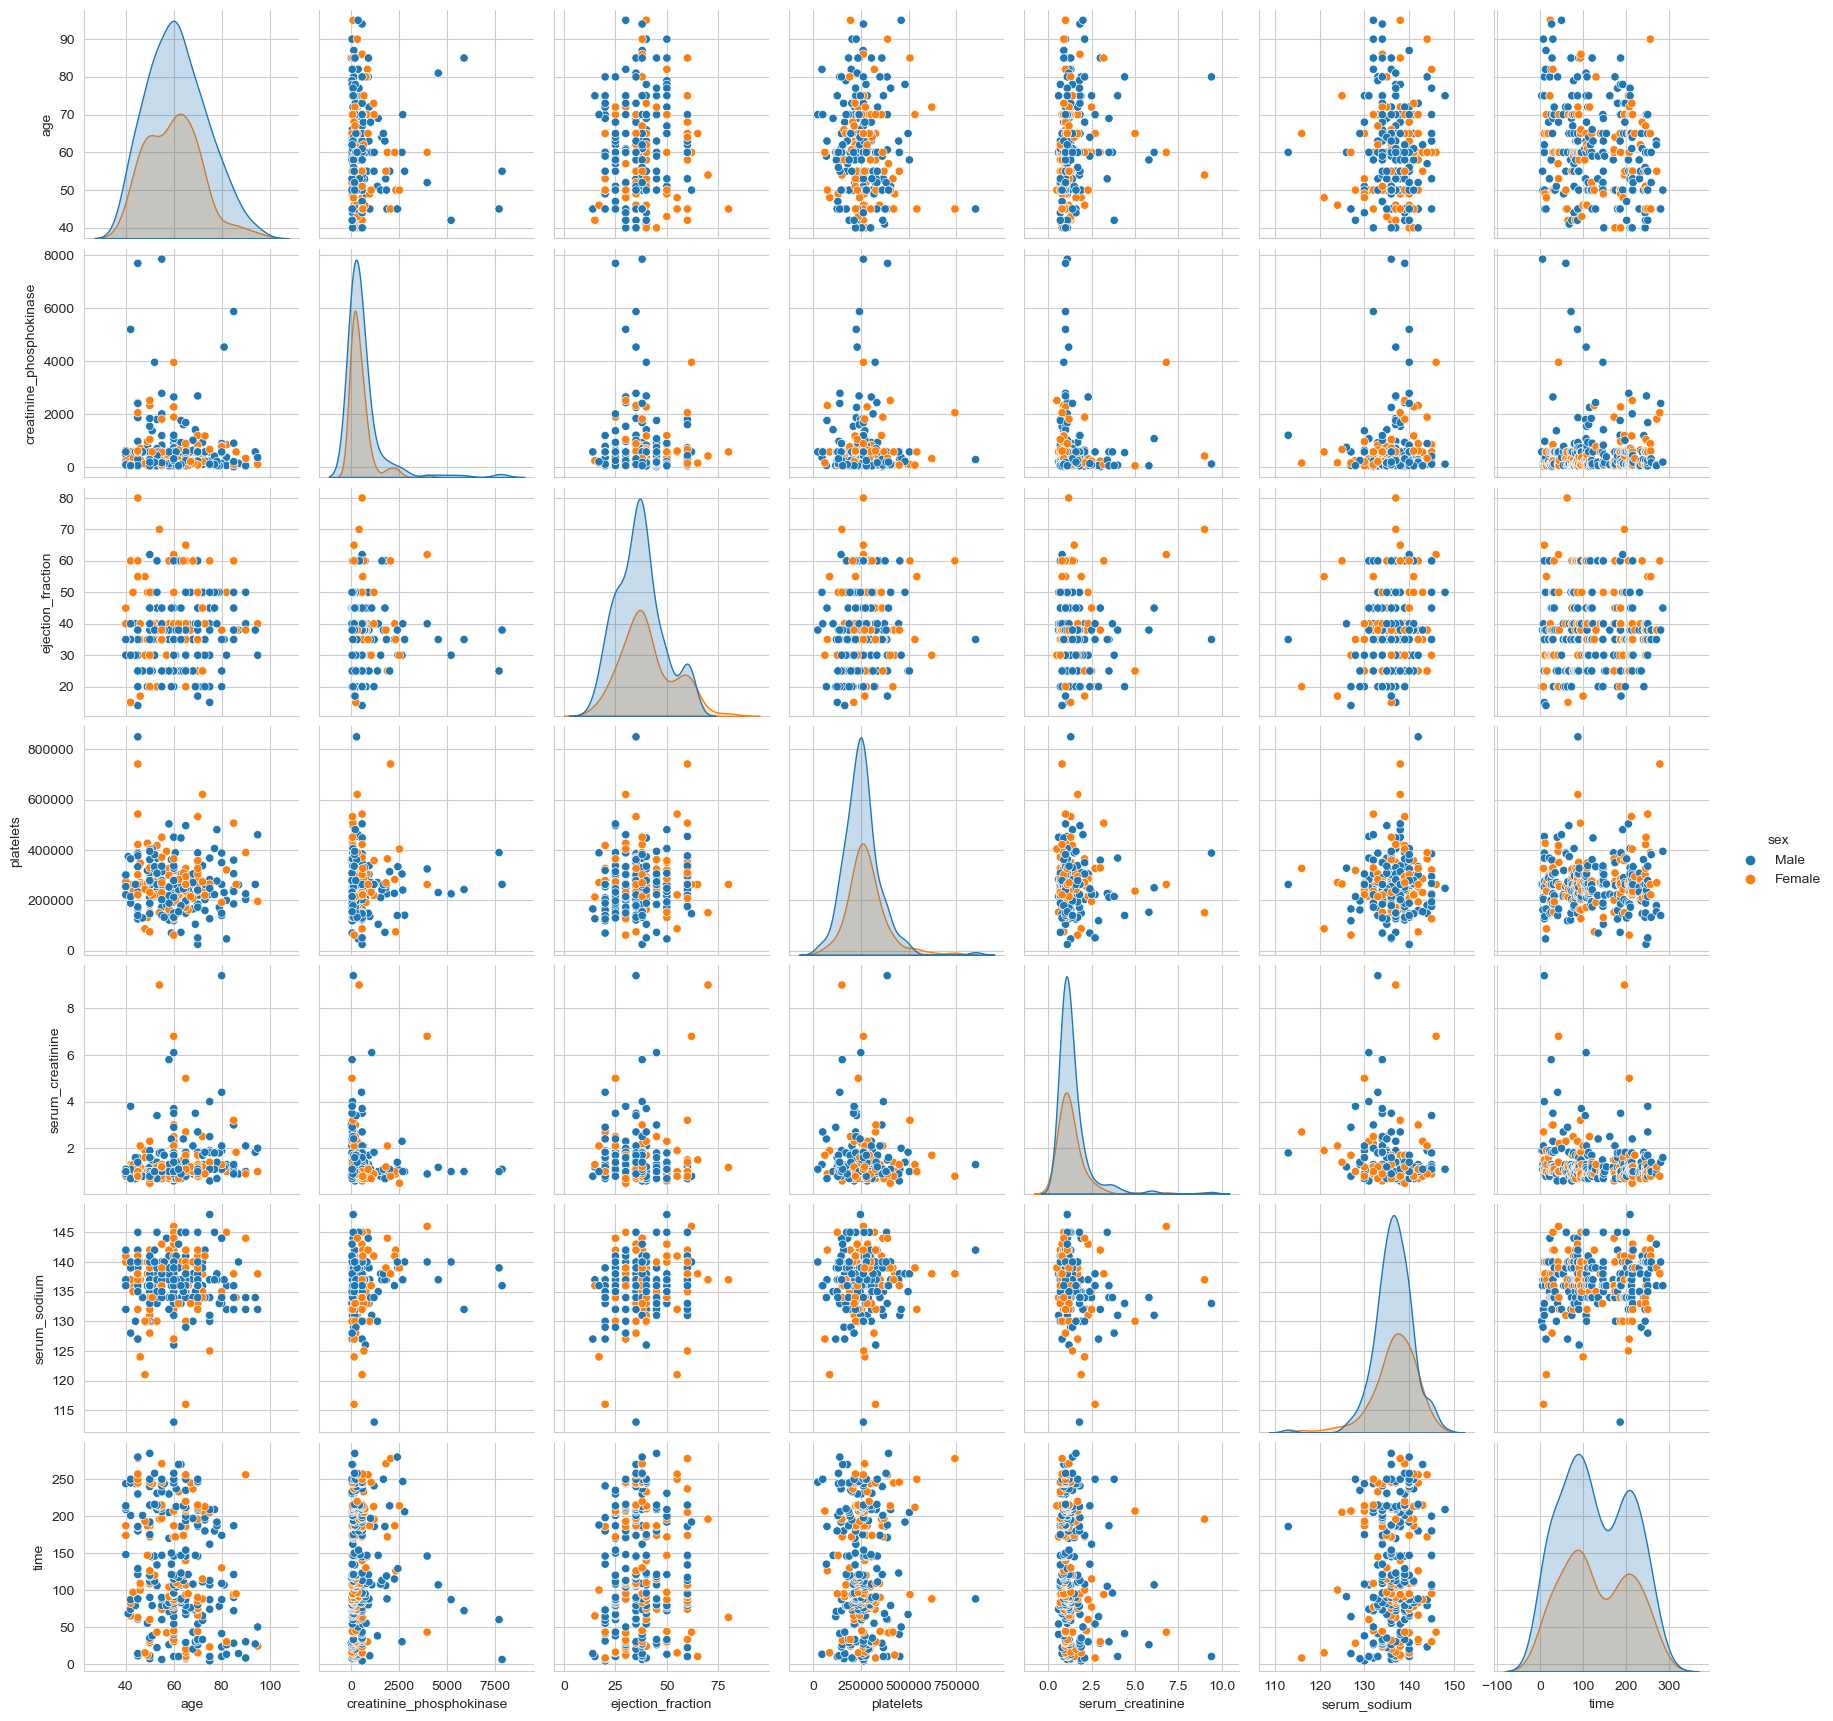

In [4]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))
    sns.pairplot(data=df, hue='sex')

There appear to be no noticeable correlations between the numerical features in the data set.

### Box plots on numerical features

I show below a series of box plots of death events versus age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium segregated on sex, diabetes, smoking and high blood pressure.

What stands out in the box plots is the noticeable difference in the death events between both ejection fraction and serum creatinine, on all categories of sex, smoking, diabetes and high blood pressure, as was suggested in the research article itself. The presence of the many outliers however doesn't make the difference truly stand out, for this we'll need further analyses.

#### Box plots of death event versus age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium segregated on sex

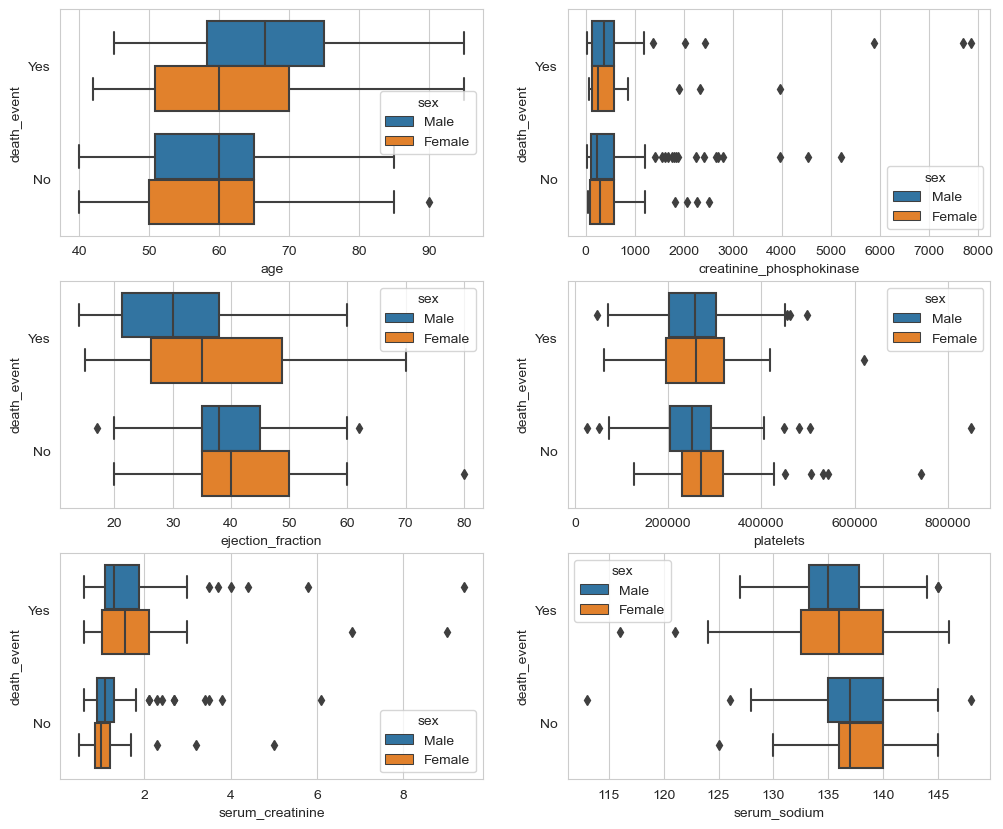

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))
    sns.boxplot(x='age', y='death_event', hue='sex', data=df, ax=ax[0, 0])
    sns.boxplot(x='creatinine_phosphokinase', y='death_event', hue='sex', data=df, ax=ax[0, 1])
    sns.boxplot(x='ejection_fraction', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    sns.boxplot(x='platelets', y='death_event', hue='sex', data=df, ax=ax[1, 1])
    sns.boxplot(x='serum_creatinine', y='death_event', hue='sex', data=df, ax=ax[2, 0])
    sns.boxplot(x='serum_sodium', y='death_event', hue='sex', data=df, ax=ax[2, 1])

#### Box plots of death event versus age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium segregated on diabetes

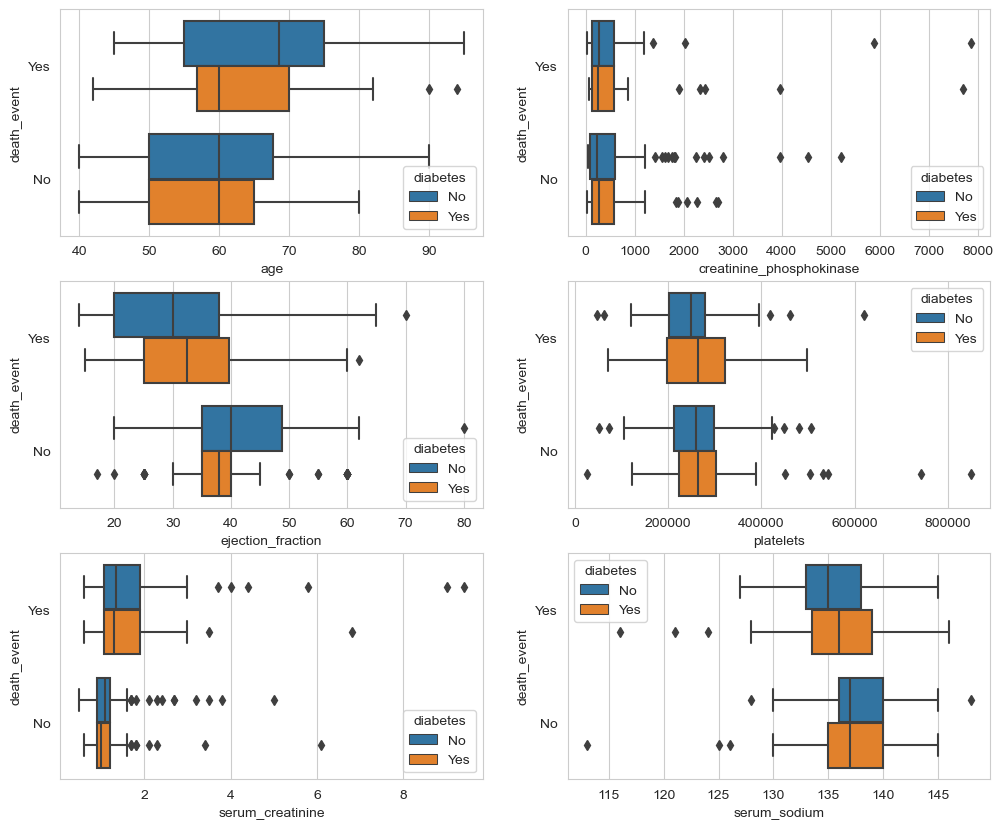

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))
    sns.boxplot(x='age', y='death_event', hue='diabetes', data=df, ax=ax[0, 0])
    sns.boxplot(x='creatinine_phosphokinase', y='death_event', hue='diabetes', data=df, ax=ax[0, 1])
    sns.boxplot(x='ejection_fraction', y='death_event', hue='diabetes', data=df, ax=ax[1, 0])
    sns.boxplot(x='platelets', y='death_event', hue='diabetes', data=df, ax=ax[1, 1])
    sns.boxplot(x='serum_creatinine', y='death_event', hue='diabetes', data=df, ax=ax[2, 0])
    sns.boxplot(x='serum_sodium', y='death_event', hue='diabetes', data=df, ax=ax[2, 1])

#### Box plots of death event versus age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium segregated on smoking

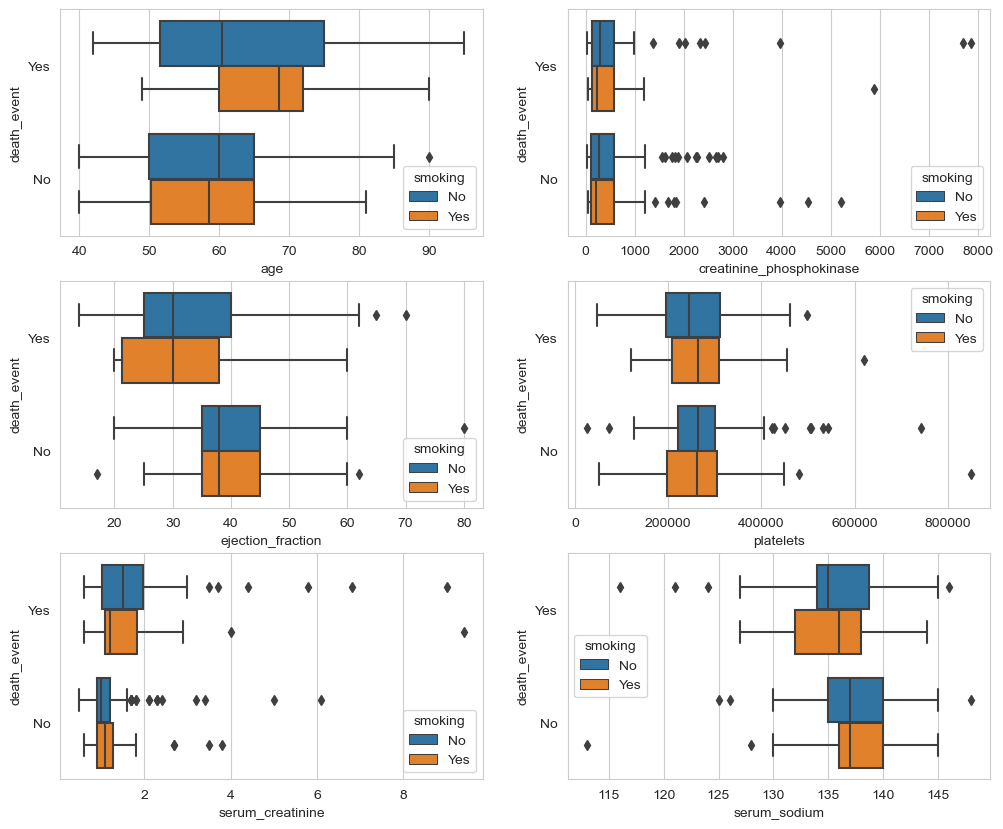

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))
    sns.boxplot(x='age', y='death_event', hue='smoking', data=df, ax=ax[0, 0])
    sns.boxplot(x='creatinine_phosphokinase', y='death_event', hue='smoking', data=df, ax=ax[0, 1])
    sns.boxplot(x='ejection_fraction', y='death_event', hue='smoking', data=df, ax=ax[1, 0])
    sns.boxplot(x='platelets', y='death_event', hue='smoking', data=df, ax=ax[1, 1])
    sns.boxplot(x='serum_creatinine', y='death_event', hue='smoking', data=df, ax=ax[2, 0])
    sns.boxplot(x='serum_sodium', y='death_event', hue='smoking', data=df, ax=ax[2, 1])

#### Box plots of death event versus age, creatinine phosphokinase, ejection fraction, platelets, serum creatinine and serum sodium segregated on high blood pressure

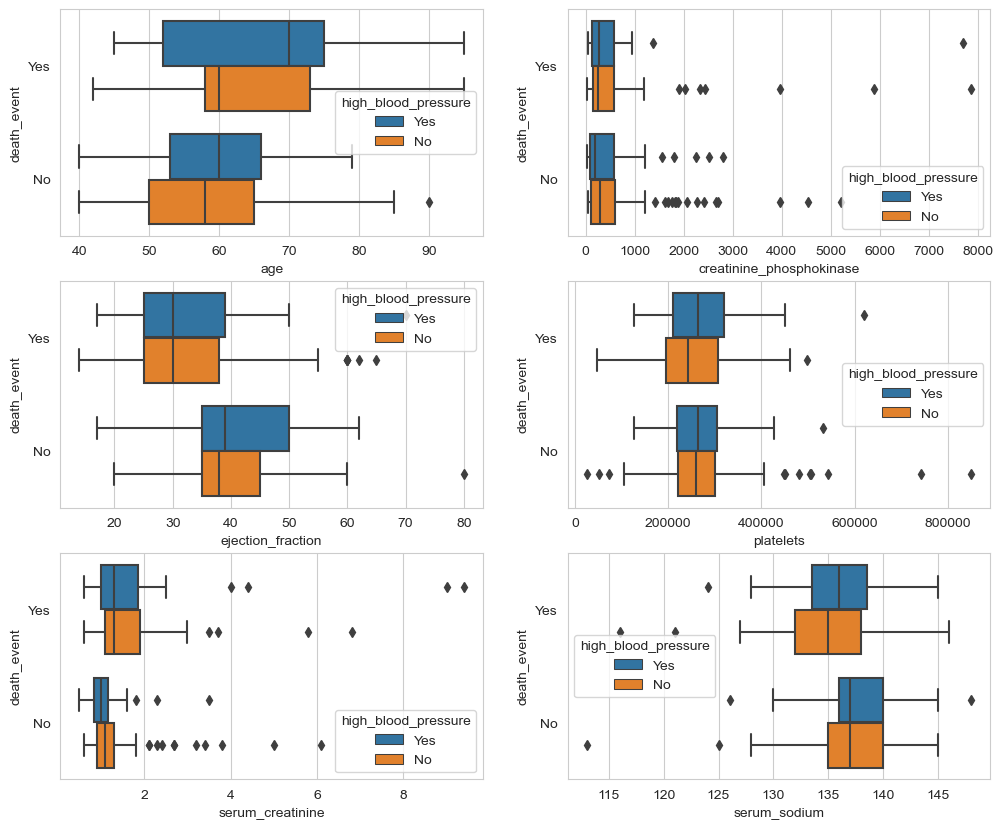

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))
    sns.boxplot(x='age', y='death_event', hue='high_blood_pressure', data=df, ax=ax[0, 0])
    sns.boxplot(x='creatinine_phosphokinase', y='death_event', hue='high_blood_pressure', data=df, ax=ax[0, 1])
    sns.boxplot(x='ejection_fraction', y='death_event', hue='high_blood_pressure', data=df, ax=ax[1, 0])
    sns.boxplot(x='platelets', y='death_event', hue='high_blood_pressure', data=df, ax=ax[1, 1])
    sns.boxplot(x='serum_creatinine', y='death_event', hue='high_blood_pressure', data=df, ax=ax[2, 0])
    sns.boxplot(x='serum_sodium', y='death_event', hue='high_blood_pressure', data=df, ax=ax[2, 1])

### Bar plots of counts of death events, anaemia, diabetes, high blood pressure, sex and smoking

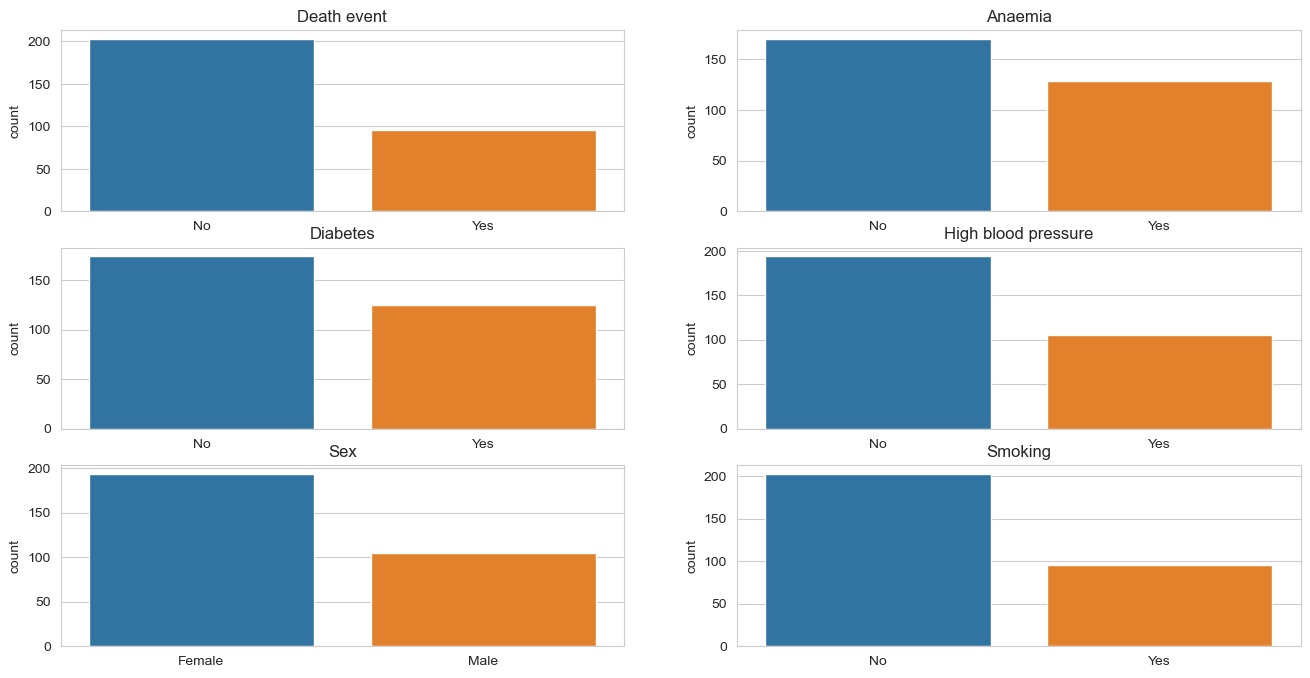

In [70]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(16, 8))    
    de_df = df.death_event.value_counts()
    sns.barplot(x=['No', 'Yes'], y=de_df, ax=ax[0, 0])
    ax[0, 0].set_title('Death event')
    an_df = df.anaemia.value_counts()
    sns.barplot(x=['No', 'Yes'], y=an_df, ax=ax[0, 1])
    ax[0, 1].set_title('Anaemia')
    db_df = df.diabetes.value_counts()
    sns.barplot(x=['No', 'Yes'], y=db_df, ax=ax[1, 0])
    ax[1, 0].set_title('Diabetes')
    hbp_df = df.high_blood_pressure.value_counts()
    sns.barplot(x=['No', 'Yes'], y=hbp_df, ax=ax[1, 1])
    ax[1, 1].set_title('High blood pressure')
    sex_df = df.sex.value_counts()
    sns.barplot(x=['Female', 'Male'], y=sex_df, ax=ax[2, 0])
    ax[2, 0].set_title('Sex')
    smk_df = df.smoking.value_counts()
    sns.barplot(x=['No', 'Yes'], y=smk_df, ax=ax[2, 1])
    ax[2, 1].set_title('Smoking')

## Modeling

### Data preparation for modeling

In [10]:
df.death_event.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
X = df.drop('death_event', axis=1)
y = df.death_event
df.head().T

,0,1,2,3,4
age,75.0,55.0,65.0,50.0,65.0
anaemia,No,No,No,Yes,Yes
creatinine_phosphokinase,582,7861,146,111,160
diabetes,No,No,No,No,Yes
ejection_fraction,20,38,20,20,20
high_blood_pressure,Yes,No,No,No,No
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.1,1.3,1.9,2.7
serum_sodium,130,136,129,137,116
sex,Male,Male,Male,Male,Female


In [11]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [12]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [13]:
def data_transformation(X_train, X_val, X_test):
    X_train_dicts = X_train.to_dict(orient='records')
    X_val_dicts = X_val.to_dict(orient='records')
    X_test_dicts = X_test.to_dict(orient='records')
    dv = DictVectorizer(sparse=True)
    X_cat_tr = dv.fit_transform(X_train_dicts)
    feature_names = list(dv.get_feature_names_out())
    X_cat_val = dv.transform(X_val_dicts)
    X_cat_test = dv.transform(X_test_dicts)
    return X_cat_tr, X_cat_val, X_cat_test, feature_names

In [14]:
X_cat_train, X_cat_val, X_test_val, feature_names = data_transformation(X_train, X_val, X_test)

### Modeling with Logistic Regression, Decision Trees and Random Forests

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, max_depth=8, random_state=1)
    dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

    lr.fit(X_cat_train, y_train)
    dt.fit(X_cat_train, y_train)
    rf.fit(X_cat_train, y_train)

    y_pred_lr = lr.predict(X_cat_val)
    y_pred_dt = dt.predict(X_cat_val)
    y_pred_rf = rf.predict(X_cat_val)

    auc_result_lr = roc_auc_score(y_val, y_pred_lr)
    auc_result_dt = roc_auc_score(y_val, y_pred_dt)
    auc_result_rf = roc_auc_score(y_val, y_pred_rf)

    f1_score_lr = f1_score(y_val, y_pred_lr)
    f1_score_dt = f1_score(y_val, y_pred_dt)
    f1_score_rf = f1_score(y_val, y_pred_rf)

print(f'F1 score using logistic regression: {f1_score_lr.round(3):>8}')
print(f'AUC using logistic regression: {auc_result_lr.round(3):>13}')
print()
print(f'F1 score using decision trees: {f1_score_dt.round(3):>13}')
print(f'AUC using decision trees: {auc_result_dt.round(3):>18}')
print()
print(f'F1 score using random forests: {f1_score_rf.round(3):>13}')
print(f'AUC using random forests: {auc_result_rf.round(3):>18}')

F1 score using logistic regression:    0.773
AUC using logistic regression:         0.816

F1 score using decision trees:         0.826
AUC using decision trees:              0.859

F1 score using random forests:         0.864
AUC using random forests:              0.886


### Parameter tuning with Random Forests

In [105]:
param_grid = {'n_estimators': [50, 100, 200, 500],
              'max_depth': [2, 5, 10, 20],
              'min_samples_leaf': [2, 5, 10, 15]}

In [111]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    rf = RandomForestClassifier(random_state=1)
    grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_log_loss')
    grid_search.fit(X_cat_train, y_train)

In [112]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}

In [120]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_results_df.reset_index(inplace=True, drop=True)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.138130,0.003121,0.012019,0.000287,5,5,100,"{'max_depth': 5, 'min_samples_leaf': 5, 'n_est...",-0.413330,-0.423680,-0.463949,-0.433653,0.021835,1
1,0.070138,0.002762,0.007051,0.000148,5,5,50,"{'max_depth': 5, 'min_samples_leaf': 5, 'n_est...",-0.407932,-0.438719,-0.457109,-0.434587,0.020288,2
2,0.071842,0.002306,0.007028,0.000085,10,5,50,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",-0.406273,-0.441489,-0.456612,-0.434791,0.021090,3
3,0.073912,0.002564,0.007629,0.000548,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'n_es...",-0.406273,-0.441489,-0.456612,-0.434791,0.021090,3
4,0.136377,0.002141,0.011909,0.000165,10,5,100,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",-0.412498,-0.426547,-0.465553,-0.434866,0.022444,5


### Feature importance using Random Forests

In [124]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    rf = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=100, random_state=1)
    rf.fit(X_cat_train, y_train)
    feature_importances = rf.feature_importances_
    df_features = pd.Series(feature_importances, index=feature_names)
    df_features.sort_values(ascending=False, inplace=True)
df_features.head()

time                 0.414955
serum_creatinine     0.158267
ejection_fraction    0.111690
age                  0.075673
serum_sodium         0.068020
dtype: float64

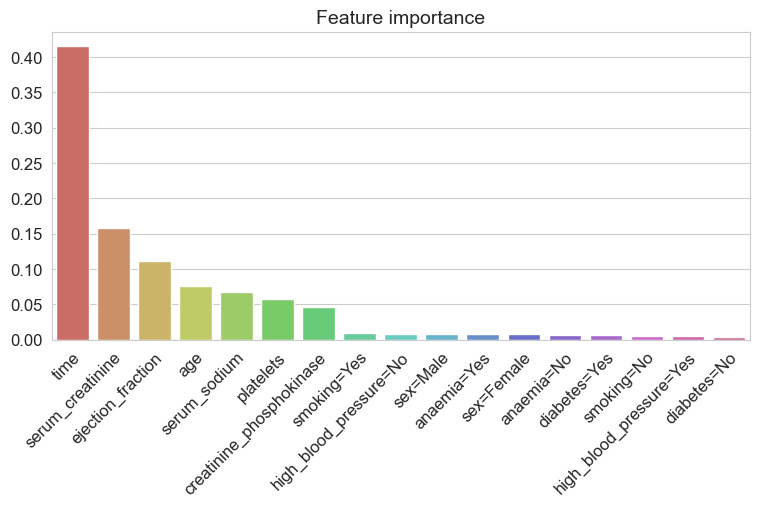

In [125]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(figsize=(9, 4))    
    sns.barplot(x=df_features.index, y=df_features.values, ax=ax, palette='hls')
    plt.setp(ax.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45, fontsize=12)
    plt.setp(ax.get_yticklabels(), fontsize=12)
    ax.set_title('Feature importance', fontsize=14)